<a href="https://colab.research.google.com/github/AnandKhandekar/Fourier-Series-SCIPY.SIGNAL/blob/main/Complete_Fourier_Series_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21st April 2021
## Mini Project- Started

# how to create internal links in COLAB
* [Linktext](# cell-id)  , use this syntax at the start.
* < a name = "cell-id" > <a>  , use this anchor tag in the destination cell

# Using SCIPY and MATPLOTLIB in Python for FOURIER SERIES visualisation

* [Pre requisites](#step-0)
* [Dirichlets conditions](#step-1)
* [Fourier Series Summation](#step-2)
* [Fourier Constants, $a_0$,$a_n$ and $b_n$](#step-3)
* [Introduction to SCIPY package](#step-4)
* [Using SCIPY.INTEGRATE.SIMPS](#step-5)
* [Calculating , $a_0$,$a_n$ and $b_n$ ](#step-6)
* [Substituting  $a_0$,$a_n$ and $b_n$ in Fourier series](#step-7)
* [Example-1: Square Wave](#step-8)
* [Example-2: SawTooth Wave](#step-9)
* [Example-3: Custom Function](#step-10)

<a name="step-0"> <a>
#Pre requisites for Fourier Series in Python
* [Plots in MatplotLib](#step-a)
* [Sub plots in MatPlotLib](#step-b)
* [Creating Ready made Wave forms with SCIPY](#original)
* [LAMBDA function](#lambda)
* for loop syntax
* LIST comprehension

<a name="step-a"> <a>
 Basic Plots in MatPlotLib

In [ ]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt

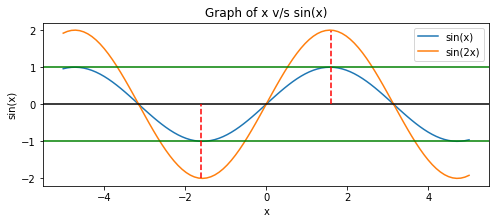

In [ ]:
x =  np.linspace(-5 ,  5 , 100 )  # to populate x
# to PLOT a GRAPH of x v/s sin(x)
y = np.sin(x)
# use MATPLOTLIB to plot the graph
plt.figure(figsize=(8,3))   
plt.plot(x,y)
plt.plot(x,2*y)                                  # i = Amplitude of what  ( current) * sin( w*x  + phase)
plt.title("Graph of x v/s sin(x)")        #   sin = opp side / hypotnuse
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.axhline(y=0,color='k')
plt.axhline(y=1,color='g')
plt.axhline(y=-1,color='g')
plt.axvline(x=1.6, ymin=0.5,ymax=0.95,color='r',linestyle='--')
plt.axvline(x=-1.6, ymin=0.05,ymax=0.5,color='r',linestyle='--')
plt.legend(['sin(x)','sin(2x)']) 

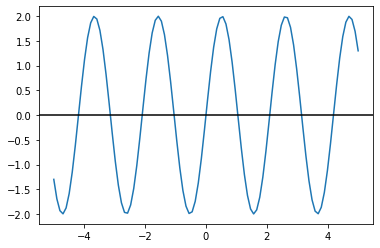

In [ ]:
#CONCEPT of AMPLITUDE and the effect on the output shape
# y = Amplitude * np.sin(frequency*x)
plt.plot(x, 2*np.sin(3*x) )
plt.axhline(y=0,color='k')

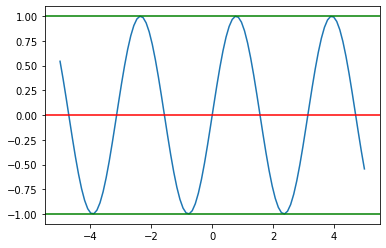

In [ ]:
# CONCEPT of FREQUENCY and its effect on the OUTPUT shape
plt.plot(x,np.sin(2*x))
plt.axhline(y=0, color= 'r')
plt.axhline(y=1, color= 'g')
plt.axhline(y=-1, color= 'g')

<a name="step-b"><a>
# Subplots in MatPlotLib

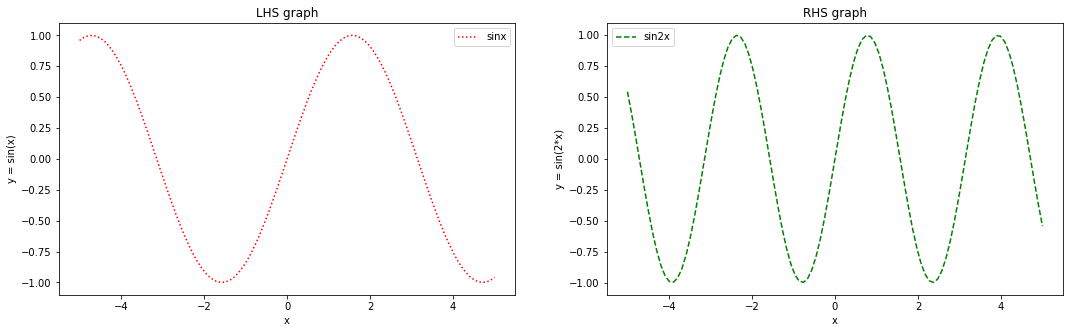

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.plot(x,np.sin(x),color='r',linestyle='dotted')
plt.title("LHS graph")
plt.xlabel('x')
plt.ylabel('y = sin(x)')
plt.legend(['sinx'],loc='best')


plt.subplot(122)
plt.plot(x,np.sin(2*x),color='g',linestyle='dashed') 
plt.title("RHS graph")
plt.xlabel('x')
plt.ylabel('y = sin(2*x)')
plt.legend(['sin2x'],loc='best')

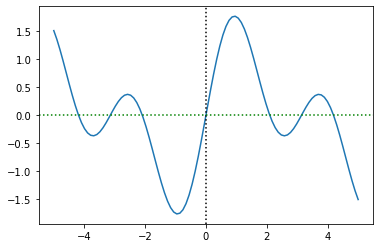

In [ ]:
# adding two functions
y = np.sin(x) + np.sin(2*x)
plt.plot(x, y) 
plt.axvline(x=0,color='k',linestyle='dotted')
plt.axhline(y=0,color='g',linestyle='dotted')

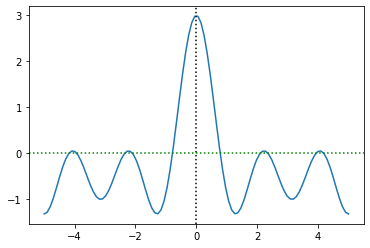

In [ ]:
y = np.cos(x) + np.cos(2*x) + np.cos(3*x) # a0=0, an=0, b1=b2=b3=1and b4 onwards =0
plt.plot(x, y) 
plt.axvline(x=0,color='k',linestyle='dotted')
plt.axhline(y=0,color='g',linestyle='dotted')

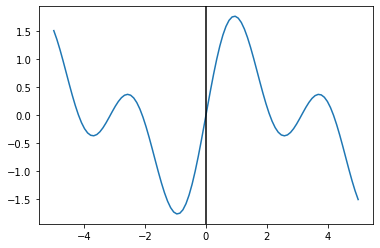

In [ ]:
# adding two functions
plt.plot( x,  ( np.sin(x) + np.sin(2*x) )  ) 
plt.axvline(x=0,color='k')

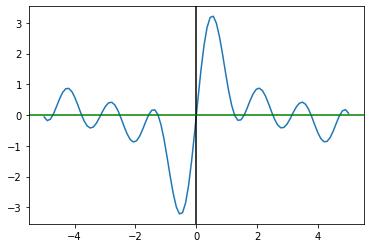

In [ ]:
plt.plot( x,  ( np.sin(x) + np.sin(2*x) + np.sin(3*x)  + np.sin(4*x)  )  )      
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='g')

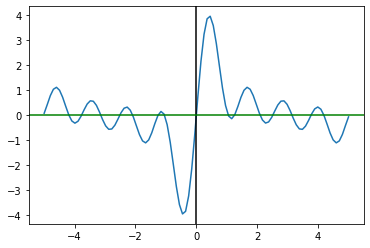

In [ ]:
plt.plot( x,  ( np.sin(x) + np.sin(2*x) + np.sin(3*x)  + np.sin(4*x) + np.sin(5*x) )  )      
plt.axvline(x=0,color='k')
plt.axhline(y=0,color='g')

<a name="original"><a>
# creating readymade wave forms in SCIPY

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal 

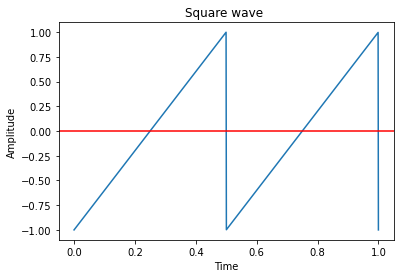

In [ ]:
t = np.linspace(0, 1, 1000,endpoint=True)       
# Plot the  readymade square wave from scipy.signal
plt.plot(  t ,  signal.sawtooth( 4*np.pi*t) )  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Square wave ')  
plt.axhline(y = 0, color = 'r')  
plt.show()

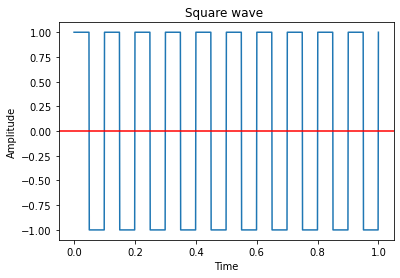

In [ ]:
t = np.linspace(0, 1, 1000,endpoint=True)       
# Plot the  readymade square wave from scipy.signal
plt.plot(  t ,   signal.square( 20*np.pi*t) )  
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Square wave ')  
plt.axhline(y = 0, color = 'r')  
plt.show()

<a name="step-1"> <a>
# Dirichlet's Conditions
the conditions that a function  f(x)  may be expressed as a Fourier Series are know as  Dirichlet  conditions. They are as follows :
* The functions  f(x)  must be periodic
* It must be single valued and continuous.
* There may be finite or    infinite number of discontinuities.
* It must have only finite numberr of maxima and minima within one period.
* The integral over one period of | f(x) | must converge.

<a name="step-2"><a>
#Fourier Series summation equation
$\huge f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty}[ a_n\;cos(\frac{n\;\pi\;x}{L})+b_n\;sin(\frac{n\;\pi\;x}{L})]$


<a name="step-3"><a>
#Fourier Series Constants
* $\huge a_0 = \frac{1}{L}\;  \int_{c}^{c+2L}f(x)\;dx$

* $\huge a_n = \frac{1}{L}\;  \int_{c}^{c+2L}f(x)\;\;cos(\frac{n\;\pi\;x}{L})dx$
* $\huge b_n = \frac{1}{L}\;  \int_{c}^{c+2L}f(x)\;\;sin(\frac{n\;\pi\;x}{L})dx$




<a name="step-4"><a>

# Introduction to SCIPY package

* Use SCIPY.integrate : Example

* [SCIPY signal  Processing](https://docs.scipy.org/doc/scipy/reference/signal.html)



<a name="step-5"><a> 

$\huge \int_0^1(2\,x^2 + 1)\;dx$

In [ ]:
# Basic Example
from scipy.integrate import quad

In [ ]:
def integrand(x, a, b):
    return a*x**2 + b
a = 2 
b = 1 
Integral = quad(  integrand, 0,1, args=(a,b)  )  
print(Integral)

(1.6666666666666667, 1.8503717077085944e-14)


<a name="step-5"><a>
# Example-2 
## Fourier series analysis for a sawtooth wav function
######Part:1
* use scipy.signal to create a SAWTOOTH pattern ( readymade)


###### Part:2
* create the SAME sawtooth pattern AGAIN using FOURIER SERIES concpets and SCIPY.integrate ( simps OR quad) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import simps
from scipy.signal import square, sawtooth

In [ ]:
L = 1      # Period of the function f(x)
freq = 2 # no of waves in the time period L
width_range = 1
samples = 1000
terms = 50

#  Part : 1

Text(0.5, 1.0, 'Original SawTooth wave')

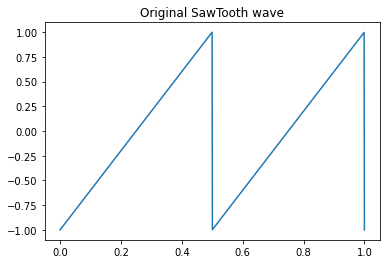

In [ ]:
# Generate the readymade SAWTOOTH pattern
x = np.linspace(0,L, samples,endpoint=True) 
y = sawtooth( 2 * np.pi* freq* x / L , width = width_range )    
plt.plot(x ,y)
plt.title("Original SawTooth wave")

<a name="step-6"><a>
<a name="step-0"><a>

#  Part : 2 - Calculate $a_0$,$a_n$ and $b_n$
* Lambda function application
* calculate the Fourier Constants individually


In [ ]:
a0 = 2.0 / L * simps(y,x) 
an = lambda n: 2.0 / L * simps ( y * np.cos(    2*np.pi * n * x  / L )  , x )  
bn = lambda n: 2.0 / L * simps ( y * np.sin(    2*np.pi * n * x  / L )  , x )


<a name="step-7"><a>
### step : 2
* substitute $a_0$,$a_n$ and $b_n$ in the RHS of Fourier Series Formula.

In [ ]:
s = a0 / 2.0  + sum ([an(k)*np.cos(2.*np.pi*k*x/L)+bn(k)*np.sin(2.*np.pi*k*x/L) for k in range(1,terms+1)])

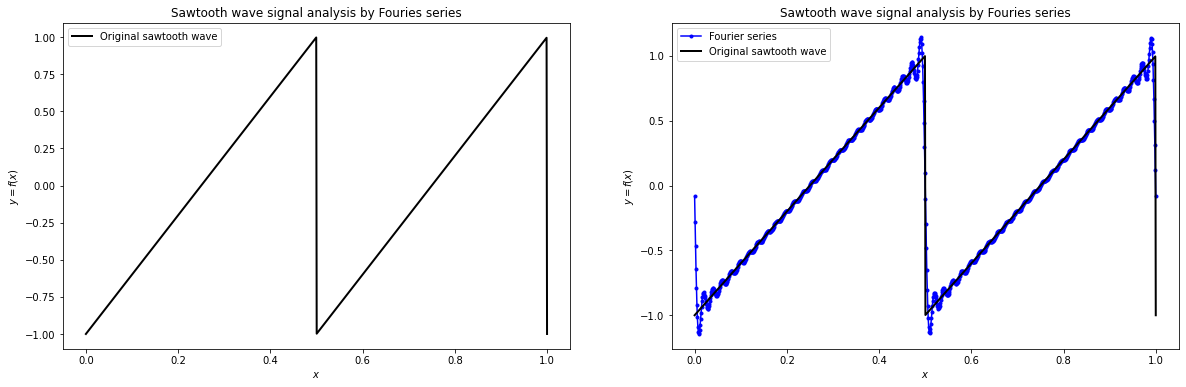

In [ ]:
# Plotting both the patterns
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(x,y,label="Original sawtooth wave",color='k', linewidth =  2)
plt.xlabel("$x$")
plt.ylabel("$y=f(x)$")
plt.legend(loc='best',prop={'size':10})
plt.title("Sawtooth wave signal analysis by Fouries series")


plt.subplot(122)
plt.plot(x,s,label="Fourier series",color='b', marker ='.')
plt.plot(x,y,label="Original sawtooth wave",color='k', linewidth =  2)
plt.xlabel("$x$")
plt.ylabel("$y=f(x)$")
plt.legend(loc='best',prop={'size':10})
plt.title("Sawtooth wave signal analysis by Fouries series")
plt.show()

[square wave](https://colab.research.google.com/drive/12D-46m3JgND_fm-RoulusI6TxD0M4_WN?authuser=2#scrollTo=l5kZYE-cKrVl)

Stored the SQUARE wav example in another COLAB notebook to avoid the numpy error of functions being named similar , twice.